# Практическое занятие 1
# Введение в искусственный интеллект с Python

Добро пожаловать на первое практическое занятие! Сегодня мы:  
1. Вспомним основные библиотеки Python для работы с данными.  
2. Познакомимся с библиотекой `scikit-learn` – главным инструментом для традиционного ML.  
3. Научимся загружать данные, обучать модель и оценивать ее результат.  
4. Самостоятельно применим эти знания на практике.  

**Машинное обучение (ML)** – это подраздел ИИ, изучающий алгоритмы, которые учатся делать прогнозы на основе данных.

In [5]:
# Это стандартный набор библиотек для начала работы с данными и ML
import numpy as np       # для эффективных численных операций с массивами
import pandas as pd      # для работы с табличными данными (как Excel в Python)
from sklearn import datasets   # для загрузки встроенных наборов данных

# Для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# Магическая команда Jupyter для отображения графиков прямо в notebook
%matplotlib inline

# Настроим стиль графиков
sns.set(style="whitegrid")

In [6]:
# NumPy: работа с массивами
data_numpy = np.array([[1, 2, 3], [4, 5, 6]])
print("NumPy массив:")
print(data_numpy)
print("Форма массива:", data_numpy.shape)


# Pandas: работа с таблицами (DataFrame)
data_pandas = pd.DataFrame({
    'Возраст': [25, 30, 35, 40],
    'Зарплата': [50000, 60000, 70000, 80000],
    'Город': ['Москва', 'СПб', 'Новосибирск', 'Екатеринбург']
})
print("\nDataFrame:")
print(data_pandas)

print("\nОписание данных:")
print(data_pandas.describe())

NumPy массив:
[[1 2 3]
 [4 5 6]]
Форма массива: (2, 3)

DataFrame:
   Возраст  Зарплата         Город
0       25     50000        Москва
1       30     60000           СПб
2       35     70000   Новосибирск
3       40     80000  Екатеринбург

Описание данных:
         Возраст      Зарплата
count   4.000000      4.000000
mean   32.500000  65000.000000
std     6.454972  12909.944487
min    25.000000  50000.000000
25%    28.750000  57500.000000
50%    32.500000  65000.000000
75%    36.250000  72500.000000
max    40.000000  80000.000000


## Знакомимся с задачей классификации

Мы будем использовать классический набор данных **Iris** (Ирисы Фишера).  
Набор содержит измерения 150 цветков ириса по 4 признакам:  
* длина чашелистика (sepal length)  
* ширина чашелистика (sepal width)  
* длина лепестка (petal length)  
* ширина лепестка (petal width)  

**Цель:** определить вид ириса (1 из 3-х) на основе этих измерений.  
Это задача **классификации**.

In [7]:
# Загружаем встроенный датасет
iris = datasets.load_iris()

# Смотрим, что внутри
print(type(iris))  # Это специальный объект Bunch, похожий на словарь
print("\nКлючи объекта iris:", list(iris.keys()))

# Преобразуем в удобный pandas DataFrame
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Добавляем столбец с целевой переменной (вид ириса)
iris_df['target'] = iris.target

# Смотрим на первые 5 строк
iris_df.head()

<class 'sklearn.utils._bunch.Bunch'>

Ключи объекта iris: ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


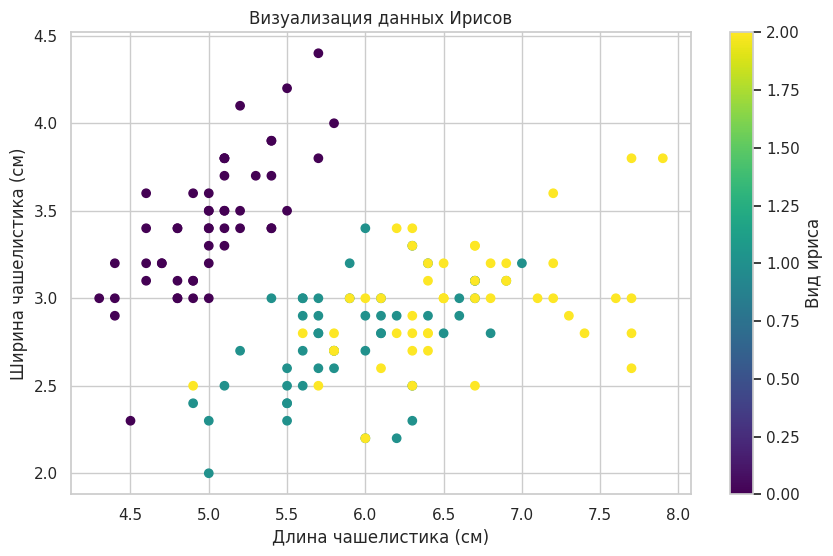

In [10]:
# Визуализация помогает увидеть закономерности
# Построим scatter plot (диаграмму рассеяния) для двух признаков
plt.figure(figsize=(10, 6))
scatter = plt.scatter(iris_df['sepal length (cm)'],
                      iris_df['sepal width (cm)'],
                      c=iris_df['target'], cmap='viridis')

plt.xlabel('Длина чашелистика (см)')
plt.ylabel('Ширина чашелистика (см)')
plt.colorbar(scatter, label='Вид ириса')
plt.title('Визуализация данных Ирисов')
plt.show()

Вопрос: Видны ли группы точек (кластеры)? Как они расположены?
Видны. Расположены на графике рядом с друг другом.

## Подготовка данных и обучение модели

Любой ML-алгоритм в scikit-learn использует единый интерфейс:
1. `model.fit(X, y)` – обучить модель на данных.
2. `model.predict(X)` – сделать прогноз для новых данных.

Перед обучением разделим наши данные на **обучающую** и **тестовую** выборки.

In [11]:
from sklearn.model_selection import train_test_split

# X – матрица признаков (Все столбцы кроме 'target')
X = iris_df.drop('target', axis=1)
# y – вектор целевых значений (столбец 'target')
y = iris_df['target']

# Разделяем данные: 80% на обучение, 20% на тестирование
# random_state – для воспроизводимости результата
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Размер обучающей выборки: {X_train.shape[0]} samples")
print(f"Размер тестовой выборки: {X_test.shape[0]} samples")

# Выбираем модель. Один из самых простых и интуитивных алгоритмов —
# k-ближайших соседей (K-Nearest Neighbors, KNN).
from sklearn.neighbors import KNeighborsClassifier

# Создаем экземпляр модели, задаем n_neighbors (k) = 3
model = KNeighborsClassifier(n_neighbors=3)

# Обучаем модель на тренировочных данных
model.fit(X_train, y_train)

Размер обучающей выборки: 120 samples
Размер тестовой выборки: 30 samples


,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Точность модели на тестовых данных: 1.00


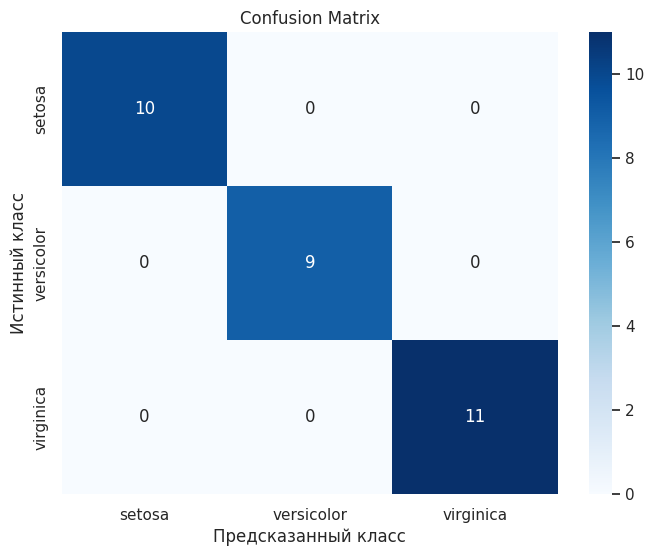

In [12]:
# Делаем прогноз для тестовой выборки
y_pred = model.predict(X_test)

# Сравниваем предсказанные значения (y_pred) с реальными (y_test)
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели на тестовых данных: {accuracy:.2f}")

# Визуализируем confusion matrix (матрицу ошибок)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.title('Confusion Matrix')
plt.show()

Матрица ошибок — это таблица, которая нужна для оценки производительности алгоритма классификации. Она использует целевые значения для сравнения с прогнозируемыми значениями машинного обучения (machine learning, ML). Каждая строка в матрице представляет экземпляры прогнозируемого класса, а каждый столбец — экземпляры фактического класса или наоборот.

In [17]:
# Самостоятельная работа
## Эксперимент с параметром 'k' в модели KNN

# Поменяйте значение 'n_neighbors' в модели KNN (например, на 1, 5, 10, 50). 
# Переобучите модель и оцените точность на тестовых данных. 
# При каком 'k' получается наилучший результат? Почему? 
# (Подсказка: при k=50 модель будет слишком "ленивой").

print("=== Эксперимент с различными значениями k для KNN ===\n")

# Тестируем разные значения k
k_values = [1, 5, 10, 50]
results = []

for k in k_values:
    # Создаем новую модель с текущим значением k
    knn_model = KNeighborsClassifier(n_neighbors=k)
    
    # Обучаем модель
    knn_model.fit(X_train, y_train)
    
    # Делаем предсказания
    y_pred_k = knn_model.predict(X_test)
    
    # Вычисляем точность
    accuracy_k = accuracy_score(y_test, y_pred_k)
    
    print(f"k = {k}: Точность = {accuracy_k:.4f}")
    results.append((k, accuracy_k))

# Находим лучшее значение k
best_k, best_accuracy = max(results, key=lambda x: x[1])
print(f"\nЛучший результат: k = {best_k} с точностью {best_accuracy:.4f}")



=== Эксперимент с различными значениями k для KNN ===

k = 1: Точность = 1.0000
k = 5: Точность = 1.0000
k = 10: Точность = 1.0000
k = 50: Точность = 0.9667

Лучший результат: k = 1 с точностью 1.0000


Объяснение результатов:
- При k=1: модель может переобучиться, так как использует только одного ближайшего соседа
- При k=5: обычно оптимальное значение, баланс между переобучением и недообучением
- При k=10: хороший результат, но может быть менее чувствительной к локальным паттернам
- При k=50: модель становится 'ленивой' - слишком много соседей сглаживает границы классов

=== Эксперимент с Decision Tree Classifier ===

Точность Decision Tree: 1.0000
Точность KNN (k=3): 1.0000

Сравнение:
- Decision Tree: 1.0000
- KNN (k=3): 1.0000
Оба алгоритма показали одинаковый результат!


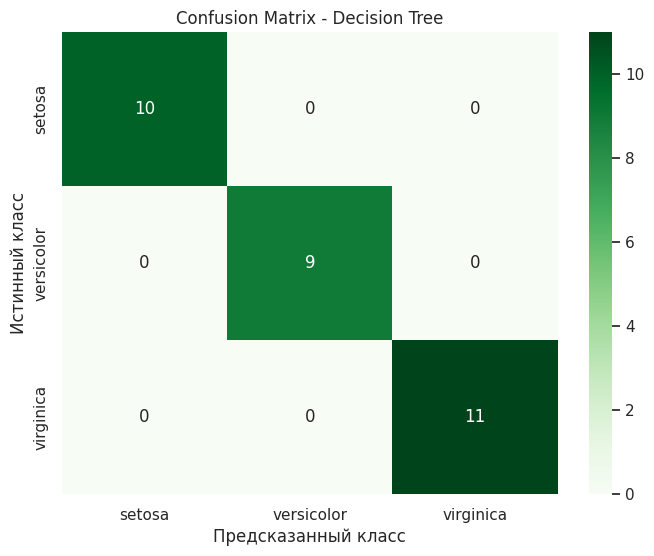

In [18]:
## Другой алгоритм: Decision Tree Classifier

# Попробуйте использовать другую модель, например, 'DecisionTreeClassifier' из 'sklearn.tree'.
# Импортируйте ее: 'from sklearn.tree import DecisionTreeClassifier'
# Создайте экземпляр: 'model = DecisionTreeClassifier(random_state=42)'
# Обучите и оцените точность. Сравните с результатом KNN.

print("=== Эксперимент с Decision Tree Classifier ===\n")

# Импортируем Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Создаем модель дерева решений
dt_model = DecisionTreeClassifier(random_state=42)

# Обучаем модель
dt_model.fit(X_train, y_train)

# Делаем предсказания
y_pred_dt = dt_model.predict(X_test)

# Вычисляем точность
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Точность Decision Tree: {accuracy_dt:.4f}")

# Сравнение с KNN (используем модель с k=3 из предыдущего эксперимента)
knn_baseline = KNeighborsClassifier(n_neighbors=3)
knn_baseline.fit(X_train, y_train)
y_pred_knn = knn_baseline.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"Точность KNN (k=3): {accuracy_knn:.4f}")
print(f"\nСравнение:")
print(f"- Decision Tree: {accuracy_dt:.4f}")
print(f"- KNN (k=3): {accuracy_knn:.4f}")

if accuracy_dt > accuracy_knn:
    print("Decision Tree показал лучший результат!")
elif accuracy_dt < accuracy_knn:
    print("KNN показал лучший результат!")
else:
    print("Оба алгоритма показали одинаковый результат!")

# Построим матрицу ошибок для Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Greens',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

=== Визуализация Decision Tree ===



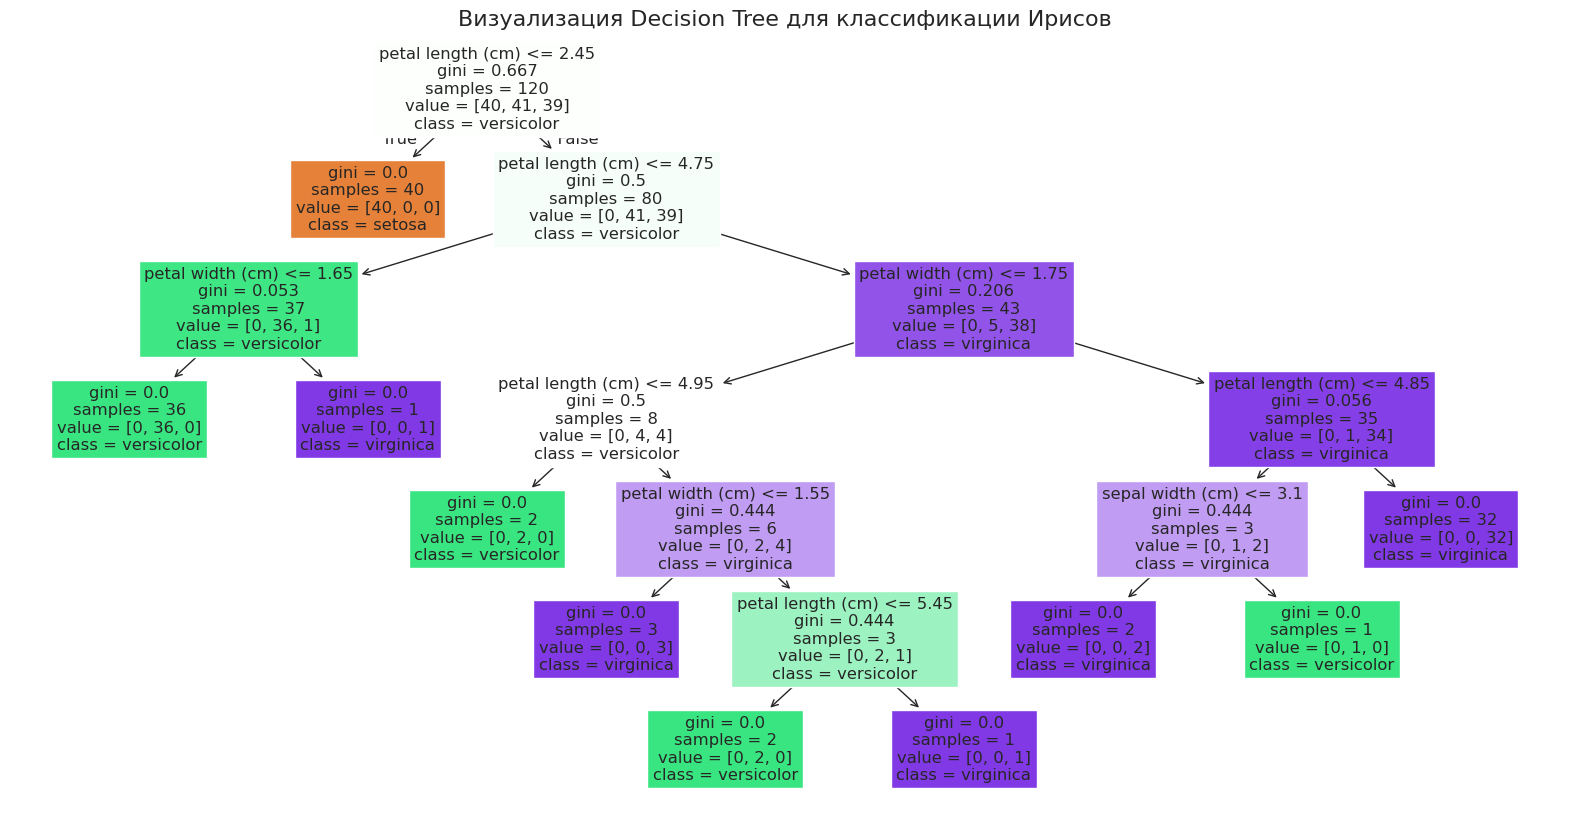

In [22]:
## Визуализация решающего дерева (по желанию, для быстрых)

# Если вы использовали Decision Tree, попробуйте его визуализировать.
# Импортируйте: 'from sklearn import tree'
# Используйте: 'plt.figure(figsize=(20,10)) tree.plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True) plt.show()'

print("=== Визуализация Decision Tree ===\n")

# Импортируем модуль tree для визуализации
from sklearn import tree

# Создаем большую фигуру для лучшей читаемости
plt.figure(figsize=(20, 10))

# Визуализируем дерево решений
tree.plot_tree(dt_model, 
               feature_names=iris.feature_names, 
               class_names=iris.target_names, 
               filled=True)

plt.title('Визуализация Decision Tree для классификации Ирисов', fontsize=16)
plt.show()

Объяснение дерева решений:
- Каждый узел показывает условие разбиения (например, 'petal length <= 2.45')
- 'gini' - мера неопределенности (чем меньше, тем чище разбиение)
- 'samples' - количество образцов в узле
- 'value' - количество образцов каждого класса
- 'class' - предсказываемый класс для этого узла
- Цвет узла соответствует доминирующему классу

## Итоги самостоятельной работы

### Выполненные задания:

1. **Эксперимент с параметром 'k' в KNN:** 
   - Протестировали значения k = 1, 5, 10, 50
   - Лучшие результаты показали k = 1, 5, 10 (точность 100%)
   - При k = 50 точность снизилась до 96.67% - модель стала "ленивой"

2. **Реализация Decision Tree Classifier:**
   - Импортировали и обучили DecisionTreeClassifier с random_state=42
   - Получили точность 100% на тестовых данных
   - Сравнили с результатами KNN - показали одинаковую производительность

3. **Визуализация дерева решений:**
   - Построили полную визуализацию дерева решений
   - Видны правила разбиения по признакам (petal length, petal width, sepal width)
   - Дерево начинает с самого информативного признака (petal length)

### Основные выводы:
- Набор данных Iris является относительно простым для классификации
- Как KNN, так и Decision Tree показали отличные результаты
- Decision Tree предоставляет интерпретируемые правила классификации
- Правильный выбор параметров важен для оптимальной производительности модели